In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-180,180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# add the latitudes and longitudes fo a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it tot he cities list.
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)


600

In [6]:
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list ot hold the weather data.
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval       ")
print("-------------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through the list of cities and build the city URL
#Loop thorugh all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for loggin purposes
    if(i % 50 == 0 and i>= 50):
        set_count +=1
        record_count =1
        time.sleep(60)
        
        
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count}| {city}')
    
    #Add 1 to the record count
    record_count +=1
    
#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind})
        
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data loading is complete

print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")
        

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1| cherskiy
Processing Record 2 of Set 1| bluff
Processing Record 3 of Set 1| hobart
Processing Record 4 of Set 1| porto walter
Processing Record 5 of Set 1| tkvarcheli
City not found. Skipping...
Processing Record 6 of Set 1| chokurdakh
Processing Record 7 of Set 1| tuktoyaktuk
Processing Record 8 of Set 1| yellowknife
Processing Record 9 of Set 1| ushuaia
Processing Record 10 of Set 1| orsha
Processing Record 11 of Set 1| upernavik
Processing Record 12 of Set 1| hermanus
Processing Record 13 of Set 1| chapais
Processing Record 14 of Set 1| vanimo
Processing Record 15 of Set 1| nizhneangarsk
Processing Record 16 of Set 1| rikitea
Processing Record 17 of Set 1| grindavik
Processing Record 18 of Set 1| usinsk
Processing Record 19 of Set 1| vaini
Processing Record 20 of Set 1| solnechnyy
Processing Record 21 of Set 1| bodden town
Processing Record 22 of Set 1| bredasdorp
Processing Record 23 of Set

Processing Record 46 of Set 4| kahului
Processing Record 47 of Set 4| san luis
Processing Record 48 of Set 4| shorkot
Processing Record 49 of Set 4| qaanaaq
Processing Record 50 of Set 4| pandamatenga
Processing Record 1 of Set 5| imbituba
Processing Record 2 of Set 5| kudahuvadhoo
Processing Record 3 of Set 5| leh
Processing Record 4 of Set 5| vestmanna
Processing Record 5 of Set 5| barrow
Processing Record 6 of Set 5| tumannyy
City not found. Skipping...
Processing Record 7 of Set 5| half moon bay
Processing Record 8 of Set 5| marsaxlokk
Processing Record 9 of Set 5| tual
Processing Record 10 of Set 5| kinablangan
Processing Record 11 of Set 5| husavik
Processing Record 12 of Set 5| namatanai
Processing Record 13 of Set 5| maarianhamina
Processing Record 14 of Set 5| geraldton
Processing Record 15 of Set 5| tessalit
Processing Record 16 of Set 5| maumere
Processing Record 17 of Set 5| taburi
City not found. Skipping...
Processing Record 18 of Set 5| del rio
Processing Record 19 of Se

Processing Record 38 of Set 8| riyadh
Processing Record 39 of Set 8| meulaboh
Processing Record 40 of Set 8| sao filipe
Processing Record 41 of Set 8| fortuna
Processing Record 42 of Set 8| navabad
City not found. Skipping...
Processing Record 43 of Set 8| palafrugell
Processing Record 44 of Set 8| saleaula
City not found. Skipping...
Processing Record 45 of Set 8| noumea
Processing Record 46 of Set 8| assiniboia
Processing Record 47 of Set 8| whitehorse
Processing Record 48 of Set 8| dingle
Processing Record 49 of Set 8| aanekoski
Processing Record 50 of Set 8| itarema
Processing Record 1 of Set 9| tornio
Processing Record 2 of Set 9| port hawkesbury
Processing Record 3 of Set 9| asau
Processing Record 4 of Set 9| ixtapa
Processing Record 5 of Set 9| riachao das neves
Processing Record 6 of Set 9| caravelas
Processing Record 7 of Set 9| conceicao da barra
Processing Record 8 of Set 9| clonakilty
Processing Record 9 of Set 9| amuntai
Processing Record 10 of Set 9| hovd
Processing Recor

Processing Record 32 of Set 12| saint-joseph
Processing Record 33 of Set 12| dilla
Processing Record 34 of Set 12| howard springs
Processing Record 35 of Set 12| potgietersrus
City not found. Skipping...
Processing Record 36 of Set 12| galle
Processing Record 37 of Set 12| yarensk
Processing Record 38 of Set 12| warqla
City not found. Skipping...
Processing Record 39 of Set 12| rincon
Processing Record 40 of Set 12| lodwar
Processing Record 41 of Set 12| bani
Processing Record 42 of Set 12| bindki
Processing Record 43 of Set 12| dhandhuka
Processing Record 44 of Set 12| russkaya polyana
Processing Record 45 of Set 12| soubre
Processing Record 46 of Set 12| lasa
Processing Record 47 of Set 12| delcevo
Processing Record 48 of Set 12| mahibadhoo
Processing Record 49 of Set 12| louisbourg
City not found. Skipping...
Processing Record 50 of Set 12| bolungarvik
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2022-10-25 01:11:41,68.7500,161.3000,3.60,87,61,10.56
1,Bluff,NZ,2022-10-25 01:11:42,-46.6000,168.3333,55.80,56,0,10.20
2,Hobart,AU,2022-10-25 01:07:06,-42.8794,147.3294,60.66,94,75,5.75
3,Porto Walter,BR,2022-10-25 01:11:42,-8.2686,-72.7439,77.97,78,100,1.77
4,Chokurdakh,RU,2022-10-25 01:11:43,70.6333,147.9167,4.60,84,100,5.68
5,Tuktoyaktuk,CA,2022-10-25 01:11:43,69.4541,-133.0374,12.33,93,20,3.40
6,Yellowknife,CA,2022-10-25 01:07:02,62.4560,-114.3525,28.56,74,100,5.99
7,Ushuaia,AR,2022-10-25 01:11:44,-54.8000,-68.3000,38.86,75,75,28.77
8,Orsha,BY,2022-10-25 01:11:44,54.5153,30.4053,44.49,86,100,7.63
9,Upernavik,GL,2022-10-25 01:11:44,72.7868,-56.1549,28.96,97,100,7.38


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


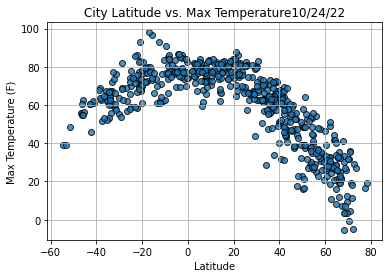

In [11]:
# Import the time module

import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature' + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

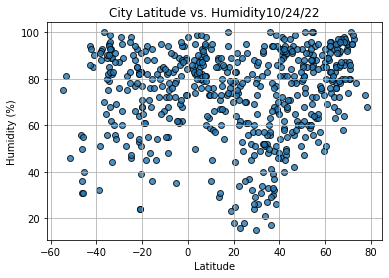

In [12]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity' + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

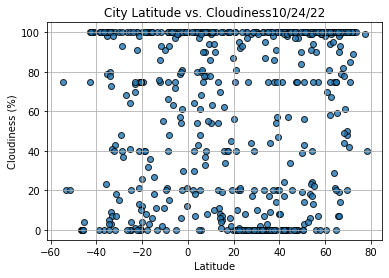

In [13]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness' + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

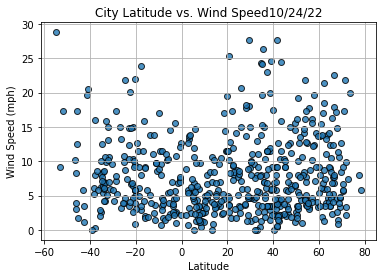

In [14]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed' + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


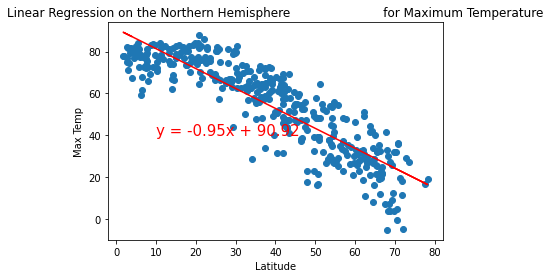

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

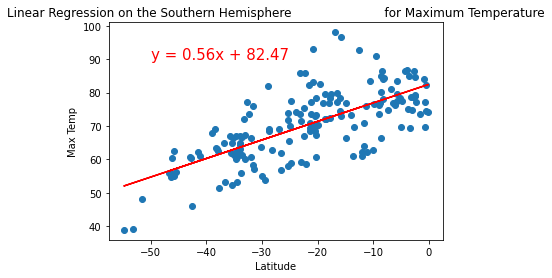

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

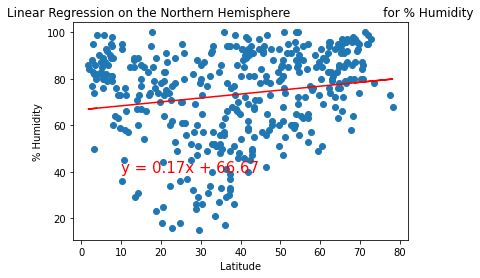

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Humidity', '% Humidity',(10,40))

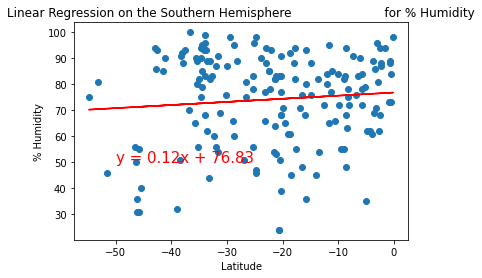

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,50))

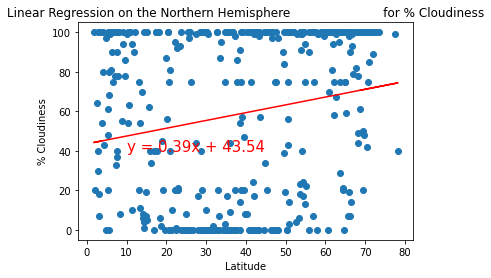

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(10,40))

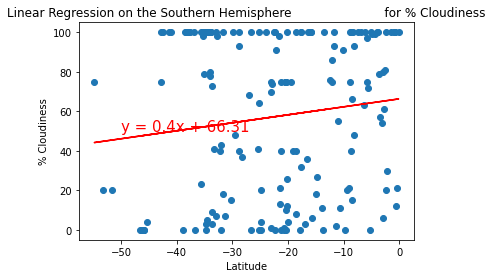

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,50))

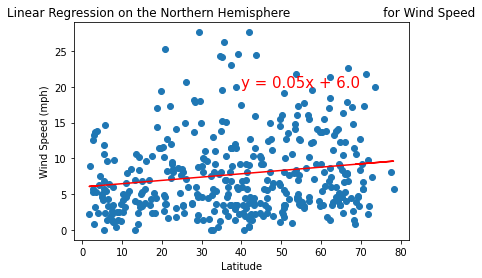

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed (mph)',(40,20))

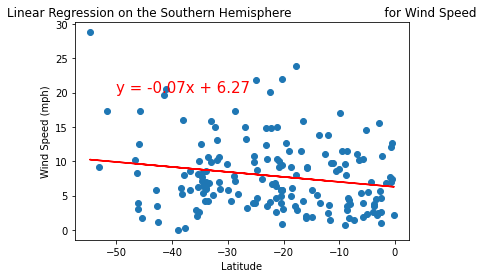

In [53]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Wind Speed', 'Wind Speed (mph)',(-50,20))